# Домашнее задание "Функции потерь и оптимизация"

Задание  
Преподаватель: Даниил Корбут, Наталья Баданина, Александр Миленькин, Анастасия Успенская  
Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
Реализовать самостоятельно логистическую регрессию  
Обучить ее методом градиентного спуска  
Методом nesterov momentum  
Методом rmsprop  

Дополнительное задание *  
В качестве dataset’а взять Iris, оставив 2 класса:  
Iris Versicolor  
Iris Virginica  

In [210]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Загрузим датасет iris:

In [211]:
iris = datasets.load_iris()

In [212]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [213]:
data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [214]:
target = pd.DataFrame(iris.target)
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()
#0 is Iris Setosa
#1 is Iris Versicolour
#2 is Iris Virginica

,target
0,0
1,0
2,0
3,0
4,0


### Удалим данные для класса Iris Setosa:

In [215]:
target = target[target['target'] != 0]
data = data[data.index.isin(target.index)]

In [216]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [217]:
target.loc[target['target'] == 1, 'target'] = 0
target.loc[target['target'] == 2, 'target'] = 1

###  Реализуем логистическую регрессию

In [218]:
# Функция классификации и сигмоидная функция
def predict(th, X):
    predict = th[0] +th[1] * X[:, 0] + th[2] * X[:, 1] + th[3] * X[:, 2] + th[4] * X[:, 3]
    sigm = 1 / (1 + np.exp(-predict))
    return sigm

In [219]:
X = data[:].values

In [220]:
Y = target['target'].values

### Обучим методом градиентного спуска:

In [289]:
lr = 0.05
th = []
loss_gradient = []
n_epochs = 100

In [290]:
#th = np.random.normal(size=(5))

In [291]:
# Зафиксируем случайные значения для использования с другими методами:
th = [-0.44394065,  0.01092931, -1.6787832 ,  0.18464182,  0.97016149]

In [292]:
new_th = np.zeros(5)

In [293]:
for _ in range(n_epochs):
    sigm = predict(th, X)
    new_th[0] = th[0] - lr * np.sum(sigm - Y)/len(sigm)
    for i in range (1,5):
        new_th[i] = th[i] - lr * np.sum((sigm - Y) * X[:, i-1])/len(sigm)
    loss_value = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    th = new_th
    loss_gradient.append(loss_value)


In [294]:
# Посчитаем количество ошибок:
np.sum(np.abs(np.around(predict(th, X)) - Y))

5.0

### Обучим методом Nesterov momentum:

In [295]:
lr = 0.05
gamma = 0.3
loss_nest_moment = []

In [296]:
th = [-0.44394065,  0.01092931, -1.6787832 ,  0.18464182,  0.97016149]

In [297]:
v = np.zeros(5)
new_v = np.zeros(5)

In [298]:
for _ in range(n_epochs):
    sigm = predict(th, X)
    loss_value = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    loss_nest_moment.append(loss_value)
    
    sigm = predict(th - gamma * v, X)
    
    new_v[0] = (gamma * v[0] + lr * np.sum(sigm - Y))/len(sigm)
    for i in range (1,5):
        new_v[i] = (gamma * v[i] + lr * np.sum((sigm - Y) * X[:, i-1]))/len(sigm)

    th -= new_v
    v = new_v

In [299]:
# Посчитаем количество ошибок:
np.sum(np.abs(np.around(predict(th, X)) - Y))

5.0

### Обучим методом rmsprop:

In [300]:
lr = 0.05
th = [-0.44394065,  0.01092931, -1.6787832 ,  0.18464182,  0.97016149]
loss_rmsprop = []
gamma = 0.97
eps = 1e-8

In [301]:
sq_grad = np.zeros(5)
grad = np.zeros(5)

In [302]:
for _ in range(n_epochs):
    sigm = predict(th, X)
    loss_value = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    loss_rmsprop.append(loss_value)
    
    
    grad[0] = np.sum(sigm - Y)/len(sigm)
    for i in range (1,5):
        grad[i] = np.sum((sigm - Y) * X[:, i-1])/len(sigm)
    
    sq_grad = gamma * sq_grad + (1 - gamma)  * grad ** 2 
    th -= lr * grad / np.sqrt(sq_grad + eps)


In [303]:
# Посчитаем количество ошибок:
np.sum(np.abs(np.around(predict(th, X)) - Y))

7.0

### Сравнение скорости убывания ошибки

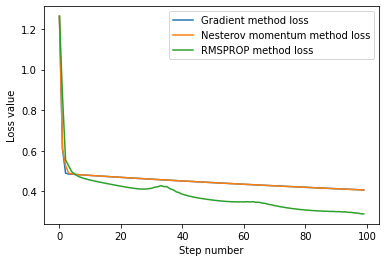

In [304]:
plt.plot(loss_gradient, label='Gradient method loss' )
plt.plot(loss_nest_moment, label='Nesterov momentum method loss' )
plt.plot(loss_rmsprop, label='RMSPROP method loss' )
plt.xlabel('Step number')
plt.ylabel('Loss value')
plt.legend()
plt.show()